# Title: Kinematics Motion Detection

# Import Libraries

In [1]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#pipeline
from sklearn.pipeline import Pipeline

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
#pip install xgboost
#pip install catboost
from xgboost import XGBClassifier
import xgboost as xgb
#from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


#evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve



#import umap
import matplotlib as mpl

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
# Load data from csv file
data = pd.read_csv('Kinematics_Data.csv')
data.head()

date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922

# Exploratory Data Analysis

In [263]:
data.shape

(88588, 11)

In [264]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [266]:
data.describe()

wrist      activity  acceleration_x  acceleration_y  \
count  88588.000000  88588.000000    88588.000000    88588.000000   
mean       0.522170      0.500801       -0.074811       -0.562585   
std        0.499511      0.500002        1.009299        0.658458   
min        0.000000      0.000000       -5.350500       -3.299000   
25%        0.000000      0.000000       -0.381800       -1.033500   
50%        1.000000      1.000000       -0.059500       -0.759100   
75%        1.000000      1.000000        0.355500       -0.241775   
max        1.000000      1.000000        5.603300        2.668000   

       acceleration_z        gyro_x        gyro_y        gyro_z  
count    88588.000000  88588.000000  88588.000000  88588.000000  
mean        -0.313956      0.004160      0.037203      0.022327  
std          0.486815      1.253423      1.198725      1.914423  
min         -3.753800     -4.430600     -7.464700     -9.480000  
25%         -0.376000     -0.920700     -0.644825     -1.345125  
50%         -0.221000      0.018700      0.039300      0.006900  
75%         -0.085900      0.888800      0.733700      1.398200  
max          1.640300      4.874200      8.498000     11.266200

### Understanding Target Variable

In [267]:
data['activity'].unique()

array([0, 1], dtype=int64)

In [268]:
data['activity'].value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [269]:
data.corr()

wrist  activity  acceleration_x  acceleration_y  \
wrist           1.000000 -0.113404       -0.609579        0.087091   
activity       -0.113404  1.000000       -0.017747        0.639520   
acceleration_x -0.609579 -0.017747        1.000000       -0.265169   
acceleration_y  0.087091  0.639520       -0.265169        1.000000   
acceleration_z  0.323680 -0.192435       -0.552374        0.106220   
gyro_x         -0.022092  0.040856       -0.021705        0.010549   
gyro_y         -0.068403  0.012055       -0.004091        0.072170   
gyro_z          0.008796 -0.008106       -0.060849       -0.022994   

                acceleration_z    gyro_x    gyro_y    gyro_z  
wrist                 0.323680 -0.022092 -0.068403  0.008796  
activity             -0.192435  0.040856  0.012055 -0.008106  
acceleration_x       -0.552374 -0.021705 -0.004091 -0.060849  
acceleration_y        0.106220  0.010549  0.072170 -0.022994  
acceleration_z        1.000000  0.035296 -0.021004  0.049621  
gyro_x                0.035296  1.000000  0.094011  0.317769  
gyro_y               -0.021004  0.094011  1.000000  0.287244  
gyro_z                0.049621  0.317769  0.287244  1.000000

In [270]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

<AxesSubplot:>

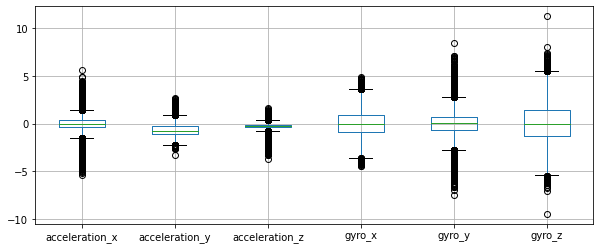

In [271]:
data.boxplot(figsize=(10, 4), column=[
             'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'])

#### Relationship Analysis

In [3]:
numerics = data[['activity', 'wrist', 'acceleration_x',
                 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]

<AxesSubplot:>

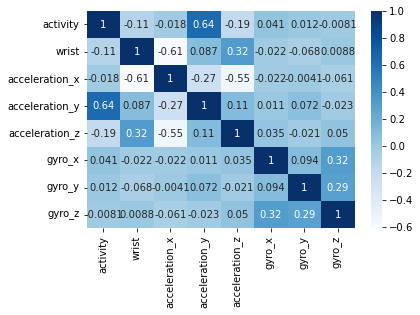

In [273]:
sns.heatmap(numerics.corr(), cmap='Blues', annot=True)

[Text(0.5, 0, 'Activity'), Text(0.5, 1.0, 'Activity Count')]

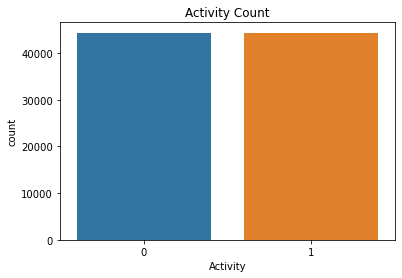

In [274]:
ax= plt.axes()
g = sns.countplot(data=data, x='activity')
ax.set(xlabel='Activity',title='Activity Count')

##### Result: Dark shades represents positive correlation while lighter shades represents negative correlation.

### Histograms

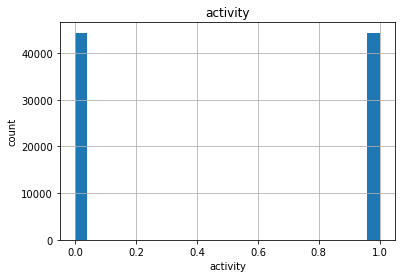

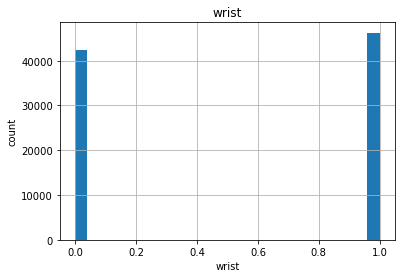

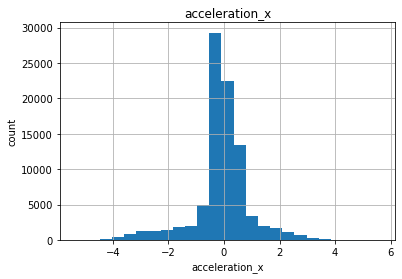

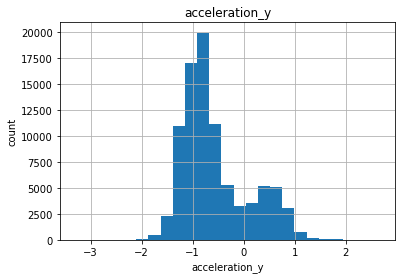

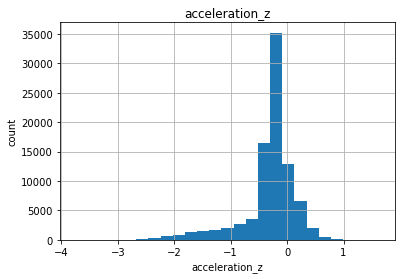

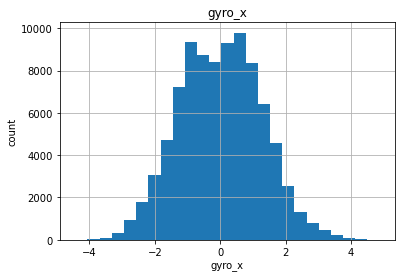

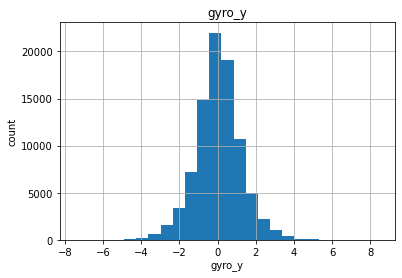

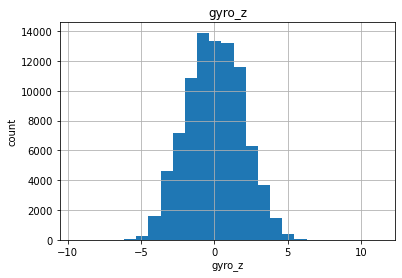

In [275]:
for x in numerics:
    data[x].hist(bins=25)
    plt.xlabel(x)
    plt.ylabel('count')
    plt.title(x)
    plt.show()

#### Result: 

In [276]:
# group target variables into churn and not churn
grouped_activity = data.groupby(data.activity)
have_activity = grouped_activity.get_group(1.0)
no_activity = grouped_activity.get_group(0.0)
have_activity

date                time username  wrist  activity  \
755    2017-6-30  20:33:44:257565021   viktor      0         1   
756    2017-6-30  20:33:44:457401990   viktor      0         1   
757    2017-6-30  20:33:44:658038020   viktor      0         1   
758    2017-6-30  20:33:44:858160972   viktor      0         1   
759    2017-6-30   20:33:45:57991981   viktor      0         1   
...          ...                 ...      ...    ...       ...   
87750   2017-7-9   20:6:14:916516005   viktor      0         1   
87751   2017-7-9   20:6:15:116733014   viktor      0         1   
87752   2017-7-9   20:6:15:315971016   viktor      0         1   
87753   2017-7-9   20:6:15:515972971   viktor      0         1   
87754   2017-7-9   20:6:15:716033995   viktor      0         1   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
755            1.2842          0.0526         -0.2362 -1.9543  2.4977  1.3038  
756            0.3057          0.4504         -0.1000  1.4730 -0.5391 -2.6030  
757            1.0601         -0.9857         -0.0732  1.4300 -0.9917 -2.3499  
758           -0.1065         -0.7203          0.2003 -0.4013  0.4240  3.0591  
759            1.0069          0.3441         -0.2760 -1.6086  2.3222  1.4736  
...               ...             ...             ...     ...     ...     ...  
87750          0.4733         -0.8527         -1.1410  0.6127  1.6790  4.8951  
87751          0.0295          0.6734         -0.2263 -0.6867  0.1436  0.0705  
87752          2.5963         -0.4055         -2.4827  0.2144  0.2478 -2.0818  
87753         -0.5401         -0.3176          0.5294  1.0999  0.0617 -0.4169  
87754          2.2590         -1.5834         -2.7183  0.1265 -0.0197  4.0140  

[44365 rows x 11 columns]

<AxesSubplot:>

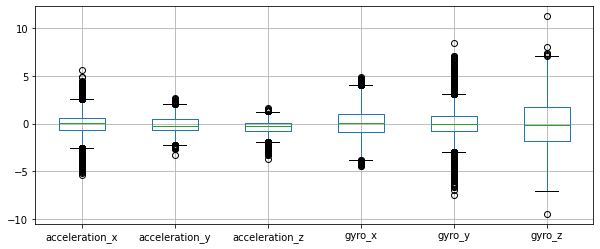

In [17]:
# plotting box plot based on churn and not churn
have_activity.boxplot(figsize=(10, 4), column=[
                      'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'])

<AxesSubplot:>

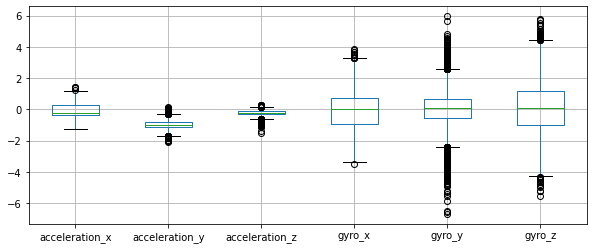

In [277]:
# plotting box plot based on churn and not churn
no_activity.boxplot(figsize=(10, 4), column=[
                    'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'])

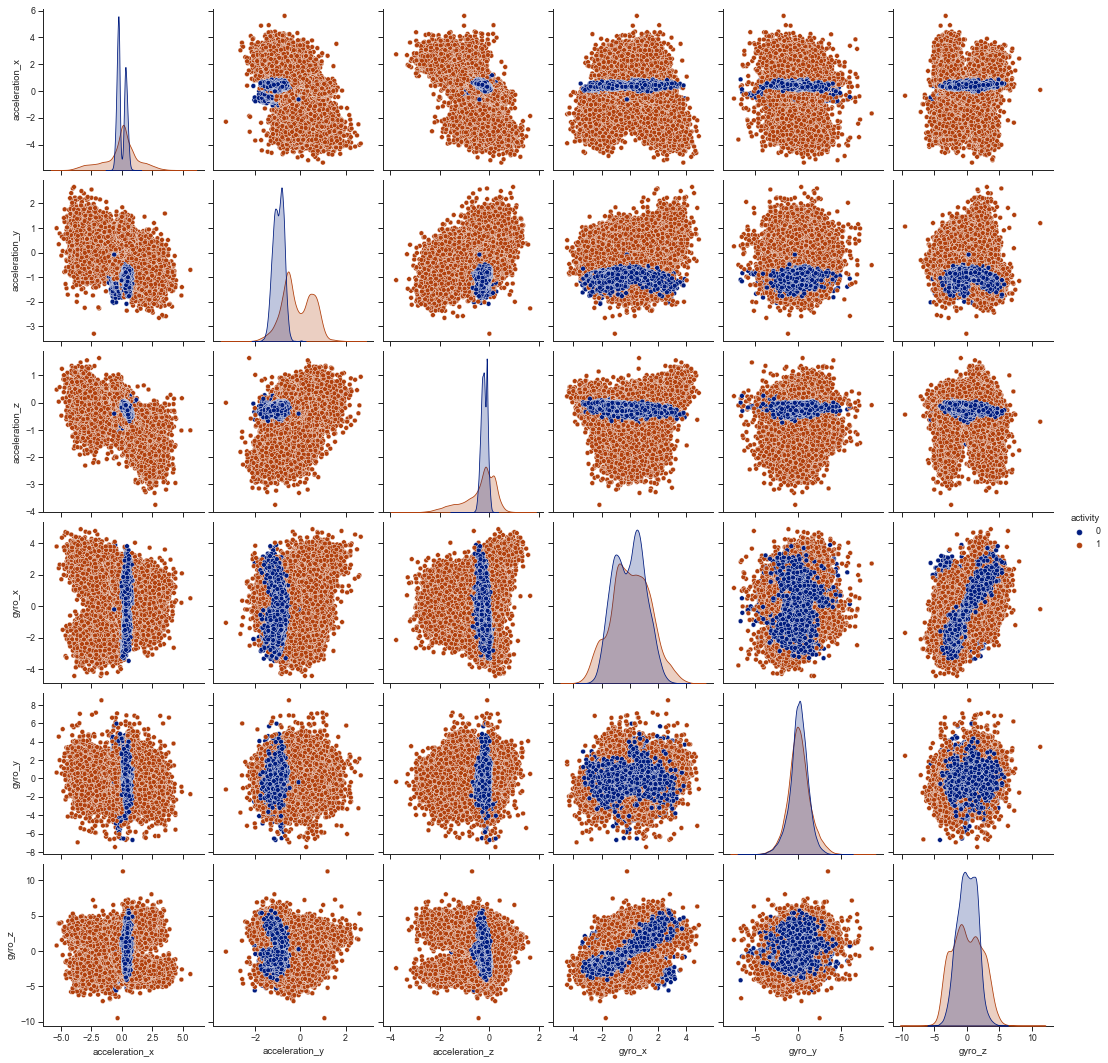

In [441]:
#to have a picture of the relaionship betwen the features
sns.set_context('paper')
sns.pairplot(data, hue= 'activity')

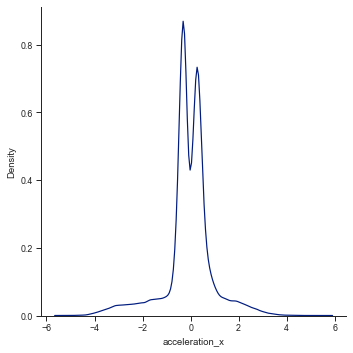

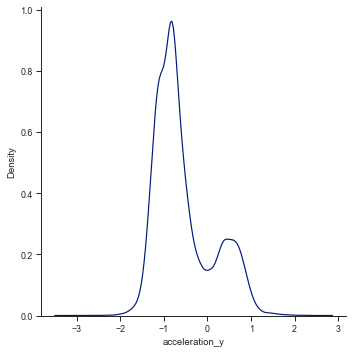

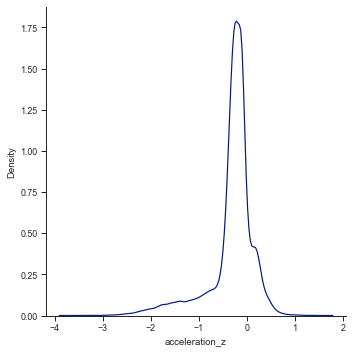

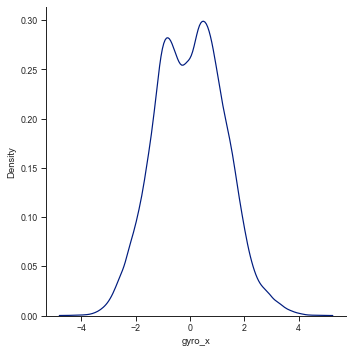

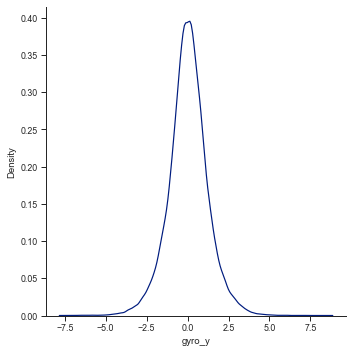

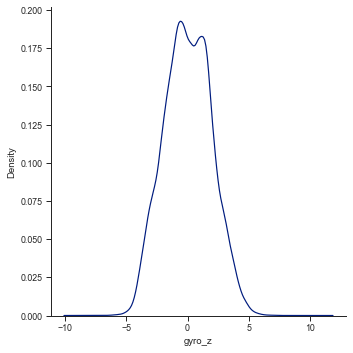

In [442]:
sns.displot(data, x="acceleration_x", kind="kde")
sns.displot(data, x="acceleration_y", kind="kde")
sns.displot(data, x="acceleration_z", kind="kde")
sns.displot(data, x="gyro_x", kind="kde")
sns.displot(data, x="gyro_y", kind="kde")
sns.displot(data, x="gyro_z", kind="kde")

# Preprocessing

### Removing Outliers

<AxesSubplot:>

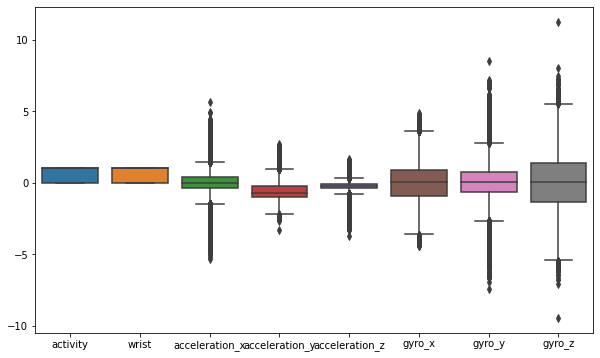

In [278]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerics)

In [4]:
cols = ['acceleration_x', 'acceleration_y',
        'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
Q1A = data[cols].quantile(0.25)
Q3A = data[cols].quantile(0.75)
IQR1 = Q3A - Q1A

data_noOutlier = data[~((data[cols] < (Q1A - 1.5 * IQR1))
                        | (data[cols] > (Q3A + 1.5 * IQR1))).any(axis=1)]
data_noOutlier['activity'].value_counts()

0    43226
1    24550
Name: activity, dtype: int64

<AxesSubplot:>

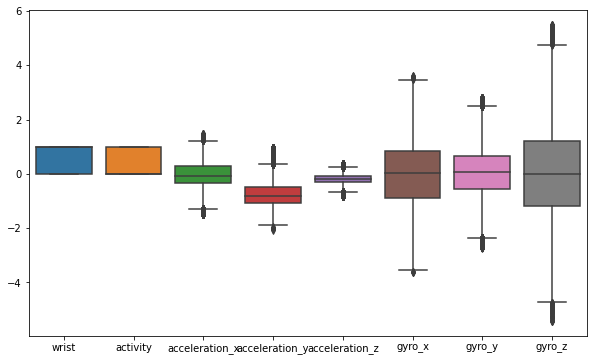

In [280]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_noOutlier)

##### Dropping unnecessary columns that does not add value or contribute to the model. This is done to save valubale resources like memory and proccessing time. 

In [5]:
data.drop(columns=['date', 'time', 'username'], inplace=True)

#### Restructuring the column arrangment for better analysation

In [6]:
data = data[['acceleration_x', 'acceleration_y', 'acceleration_z',
             'gyro_x', 'gyro_y', 'gyro_z', 'wrist', 'activity']]
data.head()

acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0          0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1          0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2          0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3          0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4          0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922   

   wrist  activity  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0

In [283]:
# Reshape/restructuring the column arrangment for better analysation
data.head()

acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0          0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1          0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269   
2          0.4399         -1.4817          0.0722 -0.9105  0.1063 -2.4367   
3          0.3031         -0.8125          0.0888  0.1199 -0.4099 -2.9336   
4          0.4814         -0.9312          0.0359  0.0527  0.4379  2.4922   

   wrist  activity  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0

In [284]:
data['wrist'].unique()
# As of now, we do not know whether 'wrist' feature will contribute to our model or not.

array([0, 1], dtype=int64)

## Drop Wrist column

In [7]:
data = data.drop(['wrist'], axis=1)

In [286]:
data.head(2)

acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  \
0          0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296   
1          0.6722         -1.1233         -0.2344 -0.1757  0.0208  0.1269   

   activity  
0         0  
1         0

### Train-Test Split

In [9]:
X = data.drop(['activity'], axis=1)
y = data['activity']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

### MinMax Scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
X_train_mm = msc.fit_transform(X_train)
X_test_mm = msc.fit_transform(X_test)

### Standard Scaler
##### Standard Scaler means standardizing a feature by subtracting the mean and then scaling to unit variance (variance = dividing all values by standard deviation).

In [11]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
X_train_ss = ssc.fit_transform(X_train)
X_test_ss = ssc.fit_transform(X_test)

### Normalizer

In [12]:
from sklearn.preprocessing import Normalizer
nsc = Normalizer()
X_train_ns = nsc.fit_transform(X_train)
X_test_ns = nsc.fit_transform(X_test)

### Robust Scaler
##### Robust Scaler means transforming the feature vector by subtracting the median and then dividing by the interquartile range. Robust Scaler is effective in reducing the effects of outliers.

In [13]:
from sklearn.preprocessing import RobustScaler
rsc = RobustScaler()
X_train_rs = rsc.fit_transform(X_train)
X_test_rs = rsc.fit_transform(X_test)

## Determine the best scaling method for each algorithm

A pipeline is created with the distance-based algorithms(KNN, LR, SVM, MLP) and all 4 scaling methods to determine the best scaling method that provides the highest accuracy for each respective algorithms.

In [292]:
scalers = [
    msc,
    ssc,
    nsc,
    rsc]

#DO NOT CHANGE THE ARRANGEMENT!
classifiers = [
    KNeighborsClassifier()
   ,LogisticRegression(),
    SVC(),
    MLPClassifier()
    
]

In [293]:
KNN_best_score = 0.0
KNN_best_scaler=""

LR_best_score = 0.0
LR_best_scaler=""

SVM_best_score = 0.0
SVM_best_scaler=""

MLP_best_score = 0.0
MLP_best_scaler=""

for clf in classifiers:
    for scaler in scalers:
        pipeline = Pipeline(steps = [
                   ('scaler', scaler)
                  ,('classifier',clf)
               ])
        model = pipeline.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print ("{}\t&  {}\t:{}".format(clf,scaler,model.score(X_test,y_test)))
        if clf==classifiers[0]:
            if model.score(X_test,y_test) > KNN_best_score:
                KNN_best_score = model.score(X_test,y_test)
                KNN_best_scaler = scaler
        elif clf==classifiers[1]:
            if model.score(X_test,y_test) > LR_best_score:
                LR_best_score = model.score(X_test,y_test)
                LR_best_scaler = scaler
        elif clf==classifiers[2]:
            if model.score(X_test,y_test) > SVM_best_score:
                SVM_best_score = model.score(X_test,y_test)
                SVM_best_scaler = scaler
        elif clf==classifiers[3]:
            if model.score(X_test,y_test) > MLP_best_score:
                MLP_best_score = model.score(X_test,y_test)
                MLP_best_scaler = scaler                
    
           

KNeighborsClassifier()	&  MinMaxScaler()	:0.9890506829213229
KNeighborsClassifier()	&  StandardScaler()	:0.9896715204876397
KNeighborsClassifier()	&  Normalizer()	:0.9830680663731798
KNeighborsClassifier()	&  RobustScaler()	:0.9898408398239079
LogisticRegression()	&  MinMaxScaler()	:0.8561914437295406
LogisticRegression()	&  StandardScaler()	:0.8556270459419799
LogisticRegression()	&  Normalizer()	:0.8900553109831809
LogisticRegression()	&  RobustScaler()	:0.8556270459419799
SVC()	&  MinMaxScaler()	:0.9862851337622757
SVC()	&  StandardScaler()	:0.9892200022575911
SVC()	&  Normalizer()	:0.9824472288068631
SVC()	&  RobustScaler()	:0.987413929337397
MLPClassifier()	&  MinMaxScaler()	:0.984817699514618
MLPClassifier()	&  StandardScaler()	:0.9908003160627611
MLPClassifier()	&  Normalizer()	:0.9878090077886895
MLPClassifier()	&  RobustScaler()	:0.9919855514166385


In [294]:
print('Scaler with best accuracy for KNN  : {}, {}'.format(KNN_best_scaler,KNN_best_score))
print('Scaler with best accuracy for LR   : {}, {}'.format(LR_best_scaler,LR_best_score))
print('Scaler with best accuracy for SVM  : {}, {}'.format(SVM_best_scaler,SVM_best_score))
print('Scaler with best accuracy for MLP  : {}, {}'.format(MLP_best_scaler,MLP_best_score))

Scaler with best accuracy for KNN  : RobustScaler(), 0.9898408398239079
Scaler with best accuracy for LR   : Normalizer(), 0.8900553109831809
Scaler with best accuracy for SVM  : StandardScaler(), 0.9892200022575911
Scaler with best accuracy for MLP  : RobustScaler(), 0.9919855514166385


# Data Modeling

# (1) KNN

### Train-test split

After train test split is done, robust scaler is applied as it gave the best accuracy for KNN when compared to other scalers

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_rs = rsc.fit_transform(X_train)
X_test_rs = rsc.fit_transform(X_test)

## 1.1 Data with Outliers

In [296]:
error_rate = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_rs, y_train)
    pred_i = knn.predict(X_test_rs)
    error_rate.append(np.mean(pred_i != y_test))

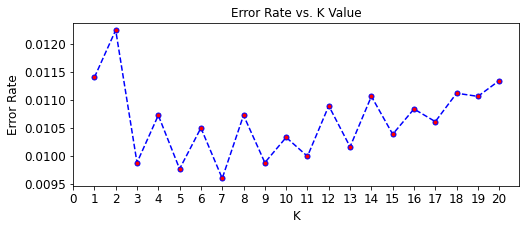

In [297]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value', fontsize=12)
plt.xlabel('K', fontsize=12)
plt.xticks(np.arange(0, 21, step=1))
plt.ylabel('Error Rate',fontsize=12)
plt.xticks(fontsize=12)

plt.yticks(fontsize=12)
plt.show()

In [298]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])


score_list = list()

for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_rs, y_train)

    y_pred = knn.predict(X_test_rs)
    score = accuracy(y_test, y_pred)

    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df.head()

k  accuracy
0  1  0.988599
1  2  0.987753
2  3  0.990123
3  4  0.989276
4  5  0.990236

K Value that gives the highest accuracy

In [299]:
print(score_df[score_df.accuracy == score_df.accuracy.max()])

   k  accuracy
6  7  0.990405


In [300]:
#Extract the best k Value that gives the highest accuracy and store it inside the variable k. 
k = int(score_df[score_df.accuracy == score_df.accuracy.max()].iloc[0]['k'])

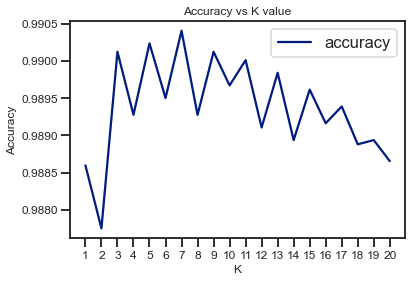

In [301]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set_xticks(range(1, 21))
plt.title('Accuracy vs K value', fontsize=12)
plt.xlabel('K', fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [302]:
knn = KNeighborsClassifier(k)
knn = knn.fit(X_train_rs, y_train)
y_pred = knn.predict(X_test_rs)
print("Accuracy Score for KNN with Outliers: ",accuracy_score(y_test, y_pred))

Accuracy Score for KNN with Outliers:  0.9904052376114686


## 1.2 Data without Outliers

### Train-Test Split

In [14]:
data_noOutlier = data_noOutlier.drop(
    columns=['date', 'time', 'username', 'wrist'])

In [304]:
data_noOutlier.head(2)

activity  acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  \
0         0          0.2650         -0.7814         -0.0076 -0.0590  0.0325   
1         0          0.6722         -1.1233         -0.2344 -0.1757  0.0208   

   gyro_z  
0 -2.9296  
1  0.1269

In [305]:
X_noO = data_noOutlier.drop(['activity'], axis=1)
y_noO = data_noOutlier['activity']
X_train_noO, X_test_noO, y_train_noO, y_test_noO = train_test_split(X_noO, y_noO, test_size=0.20, random_state=42)

#Apply Robust Scaler
X_train_noO_rs = rsc.fit_transform(X_train_noO)
X_test_noO_rs = rsc.fit_transform(X_test_noO)

In [306]:
score_list = list()

for k in range(1, 21):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train_noO_rs, y_train_noO)

    y_pred_noO = knn.predict(X_test_noO_rs)
    score = accuracy(y_test_noO, y_pred_noO)

    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df.head()

k  accuracy
0  1  0.985910
1  2  0.984730
2  3  0.988050
3  4  0.986205
4  5  0.987754

K Value that gives the highest accuracy

In [307]:
print(score_df[score_df.accuracy == score_df.accuracy.max()])

   k  accuracy
2  3   0.98805


In [308]:
#Extract the best k Value that gives the highest accuracy and store it inside the variable k. 
k = int(score_df[score_df.accuracy == score_df.accuracy.max()].iloc[0]['k'])

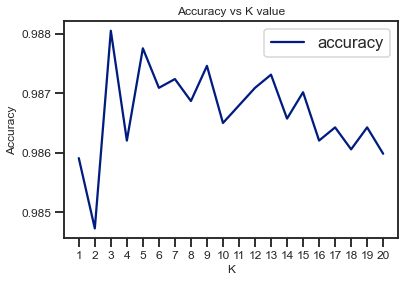

In [309]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set_xticks(range(1, 21))
plt.title('Accuracy vs K value', fontsize=12)
plt.xlabel('K', fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [310]:
knn = KNeighborsClassifier(k)
knn = knn.fit(X_train_noO_rs,  y_train_noO)
y_pred_noO = knn.predict(X_test_noO_rs)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
print("Accuracy Score for KNN without Outliers: ",accuracy_score(y_test_noO, y_pred_noO))

Accuracy Score for KNN without Outliers:  0.9880495721451755


### Evaluation

In [311]:
metrics = pd.DataFrame(index=['accuracy'],
                       columns=['Outliers','Without Outliers'])
metrics.loc['accuracy', 'Outliers'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['accuracy', 'Without Outliers'] = accuracy_score(y_pred=y_pred_noO, y_true=y_test_noO)

In [312]:
#Set DataFrame title
100*metrics
metrics.style.set_table_attributes("style='display:inline'").set_caption('K-Nearest Neighbor Accuracy With and Without Outliers')

Result: KNN model with Outliers gives better accuracy compared to without outliers so the following model evaluation will be based on the KNN model with outliers

#### Store Best Model

Store the best knn model for overall evaluation purposes later

In [313]:
#knn with outliers 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_rs = rsc.fit_transform(X_train)
X_test_rs = rsc.fit_transform(X_test)

best_knn = KNeighborsClassifier(7)
best_knn = best_knn.fit(X_train_rs, y_train)
y_pred = best_knn.predict(X_test_rs)

#### Classification report

In [314]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

0            1  accuracy     macro avg  weighted avg
precision     0.985237     0.995752  0.990405      0.990494      0.990462
recall        0.995849     0.984895  0.990405      0.990372      0.990405
f1-score      0.990514     0.990293  0.990405      0.990404      0.990405
support    8913.000000  8805.000000  0.990405  17718.000000  17718.000000

#### Cross Validation Score

In [315]:
scores = cross_val_score(best_knn, X, y, cv=5)
print('Cross validation scores of knn:')
print(scores)

Cross validation scores of knn:
[0.98114911 0.98318095 0.97821425 0.95761133 0.97014167]


#### Confusion Matrix

Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix')]

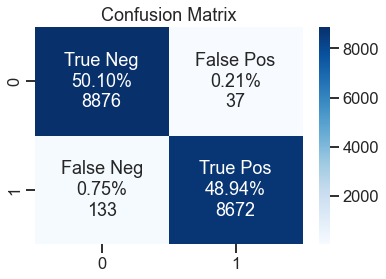

In [316]:
# Get the confusion matrix
knn_clf_matrix = confusion_matrix(y_test, y_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in knn_clf_matrix.flatten()/np.sum(knn_clf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in knn_clf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip (names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(knn_clf_matrix, annot=labels,
            fmt='', cmap='Blues').set(title='Confusion Matrix')

#### ROC Curve

In [317]:
y_pred_prob = best_knn.predict_proba(X_test_rs)[:, 1]

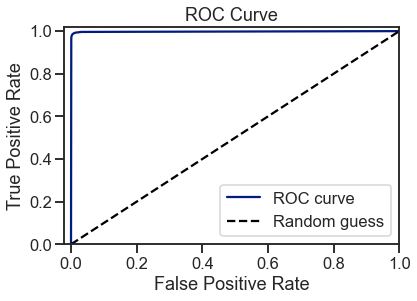

In [318]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [319]:
print("ROC Score:", roc_auc_score(y_test, y_pred_prob))

ROC Score: 0.9975082813592152


#### Precision-recall curve

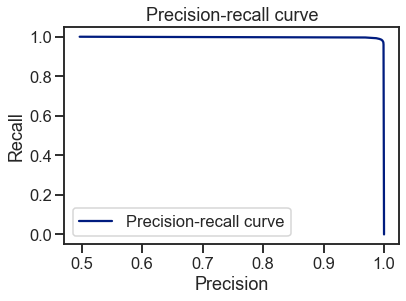

In [320]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

#### Average Precision Score

In [321]:
print("Average Precision Score: ", average_precision_score(y_test, y_pred_prob))

Average Precision Score:  0.9970767245851473


# (2) Naive Bayes

In [458]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [459]:
GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.96545808 0.97326952 0.94373956 0.93931458]


0.9554454327899942

In [460]:
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.9554454327899942,
 'bernoulli': 0.8178647220842552,
 'multinomial': nan}

gaussianNB has the highest accuracy. Therefore we are going to use gaussianNB to proceed.

### Evaluation

In [461]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

#### Accuracy Score

In [462]:
print(accuracy_score(y_test, y_pred))

0.958008804605486


#### Confusion Matrix

Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix')]

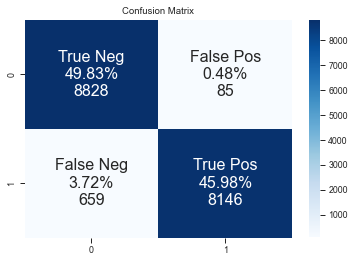

In [465]:
plt.rcParams.update({'font.size': 16})
# Get the confusion matrix
nb_matrix = confusion_matrix(y_test, y_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in nb_matrix.flatten()/np.sum(nb_matrix)]
counts = ['{0:0.0f}'.format(value) for value in nb_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip (names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(rf_clf_matrix, annot=labels,
            fmt='', cmap='Blues').set(title='Confusion Matrix')

#### Classification Report

In [47]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

0            1  accuracy     macro avg  weighted avg
precision     0.930537     0.989673  0.958009      0.960105      0.959925
recall        0.990463     0.925156  0.958009      0.957810      0.958009
f1-score      0.959565     0.956328  0.958009      0.957946      0.957956
support    8913.000000  8805.000000  0.958009  17718.000000  17718.000000

#### ROC Curve

In [48]:
y_pred_prob = nb.predict_proba(X_test)[:, 1]

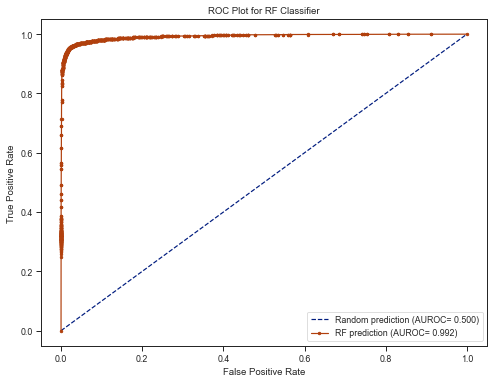

In [467]:
plt.rcParams.update({'font.size': 3})
plt.figure(figsize=(8, 6))
model = nb
#model = CalibratedClassifierCV(model)
#model.fit(X_train, y_train)

random_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test)
model_probs = model_probs[:,1]

# calculate area under roc curve
random_auc = roc_auc_score(y_test, random_probs)
model_auc = roc_auc_score(y_test, model_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='RF prediction (AUROC= %0.3f)' %model_auc)
plt.title('ROC Plot for RF Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [50]:
print("ROC Score: ", roc_auc_score(y_test, y_pred_prob))

ROC Score:  0.9923169985740765


#### Precision-recall curve

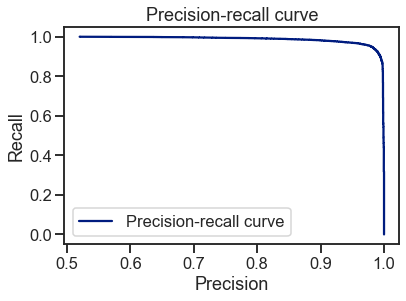

In [51]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

#### Average Precision Score

In [52]:
print("Average Precision Score: ", average_precision_score(y_test, y_pred_prob))

Average Precision Score:  0.9933520035435033


#### store best model


In [53]:
best_nb = nb

# (3) Random Forest Classifier

## (3.1) Data With Outliers

### Without Tuning

In [322]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42)

In [323]:
from sklearn.ensemble import RandomForestClassifier

In [324]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print("Accuracy for training: {}".format(rf.score(X_train, y_train)))
print("Accuracy for testing : {}".format(rf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

[[8824   89]
 [  81 8724]]
Accuracy for training: 1.0
Accuracy for testing : 0.9904052376114686


#### Hyperparameter Tuning

In [443]:
rf_params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 300]
}

from sklearn.model_selection import GridSearchCV
tuning_clf = GridSearchCV(rf, param_grid = rf_params, cv = 3, verbose=True, n_jobs=-1)
tuning_clf.fit(X_train, y_train)
tuning_clf.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [325]:
rf = RandomForestClassifier(bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print("Accuracy for training: {}".format(rf.score(X_train, y_train)))
print("Accuracy for testing : {}".format(rf.score(X_test, y_test)))
rf_with_outliers_accuracy = rf.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

[[8812  101]
 [  82 8723]]
Accuracy for training: 0.9951319317059405
Accuracy for testing : 0.9896715204876397


## (3.2) Data Without Outliers

#### Without Tuning

In [326]:
X_noO = data_noOutlier.drop(['activity'], axis=1)
y_noO = data_noOutlier['activity']
X_train, X_test, y_train, y_test = train_test_split(
    X_noO, y_noO, test_size=0.20, random_state=42)

In [327]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print("Accuracy for training: {}".format(rf.score(X_train, y_train)))
print("Accuracy for testing : {}".format(rf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8656
           1       0.98      0.98      0.98      4900

    accuracy                           0.99     13556
   macro avg       0.99      0.98      0.99     13556
weighted avg       0.99      0.99      0.99     13556

[[8577   79]
 [ 103 4797]]
Accuracy for training: 1.0
Accuracy for testing : 0.986574210681617


#### Hyperparameter Tuning

In [444]:
rf_params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 300]
}

from sklearn.model_selection import GridSearchCV
tuning_clf = GridSearchCV(rf, param_grid = rf_params, cv = 3, verbose=True, n_jobs=-1)
tuning_clf.fit(X_train, y_train)
tuning_clf.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [328]:
rf = RandomForestClassifier(bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print("Accuracy for training: {}".format(rf.score(X_train, y_train)))
print("Accuracy for testing : {}".format(rf.score(X_test, y_test)))

rf_without_outliers_accuracy = rf.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8656
           1       0.98      0.98      0.98      4900

    accuracy                           0.99     13556
   macro avg       0.99      0.98      0.99     13556
weighted avg       0.99      0.99      0.99     13556

[[8578   78]
 [ 107 4793]]
Accuracy for training: 0.9947620804131316
Accuracy for testing : 0.9863529064620832


Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix')]

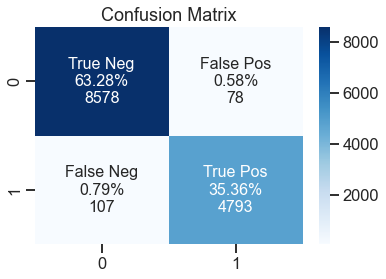

In [329]:
plt.rcParams.update({'font.size': 16})
# Get the confusion matrix
rf_clf_matrix = confusion_matrix(y_test, rf_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in rf_clf_matrix.flatten()/np.sum(rf_clf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in rf_clf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip (names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(rf_clf_matrix, annot=labels,
            fmt='', cmap='Blues').set(title='Confusion Matrix')

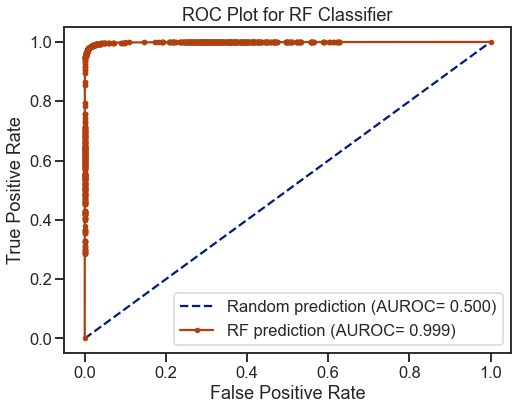

In [336]:
plt.rcParams.update({'font.size': 2})
plt.figure(figsize=(8, 6))
model = rf
#model = CalibratedClassifierCV(model)
#model.fit(X_train, y_train)

random_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test)
model_probs = model_probs[:,1]

# calculate area under roc curve
random_auc = roc_auc_score(y_test, random_probs)
model_auc = roc_auc_score(y_test, model_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='RF prediction (AUROC= %0.3f)' %model_auc)
plt.title('ROC Plot for RF Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Precision_recall_curve

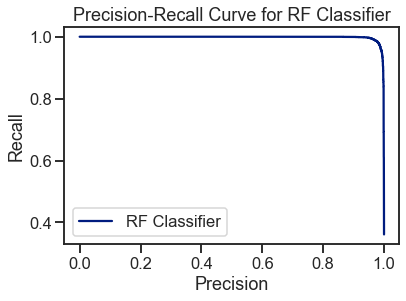

In [337]:
precision, recall, thresholds = precision_recall_curve(y_test, model_probs)
#model_f1 = f1_score(y_test, mlp_pred)
#model_auc = auc(recall, precision)
plt.plot(recall, precision, label='RF Classifier')
plt.title('Precision-Recall Curve for RF Classifier')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [338]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head(6)

feature  importance
1  acceleration_y    0.594136
2  acceleration_z    0.208604
0  acceleration_x    0.089066
5          gyro_z    0.069010
3          gyro_x    0.027428
4          gyro_y    0.011756

### Evaluation

In [468]:
metrics = pd.DataFrame(index=['accuracy'],
                       columns=['Outliers','Without Outliers'])
metrics.loc['accuracy', 'Outliers'] = rf_with_outliers_accuracy
metrics.loc['accuracy', 'Without Outliers'] = rf_without_outliers_accuracy

In [469]:
#Set DataFrame title
100*metrics
metrics.style.set_table_attributes("style='display:inline'").set_caption('RF Accuracy With and Without Outliers')

#### Store Best Model

In [341]:
best_rf = rf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


best_rf = RandomForestClassifier(bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

#### Classification Report

In [342]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

0            1  accuracy     macro avg  weighted avg
precision     0.990558     0.988551  0.989559      0.989554      0.989561
recall        0.988668     0.990460  0.989559      0.989564      0.989559
f1-score      0.989612     0.989505  0.989559      0.989558      0.989559
support    8913.000000  8805.000000  0.989559  17718.000000  17718.000000

#### Confusion Matrix

Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix')]

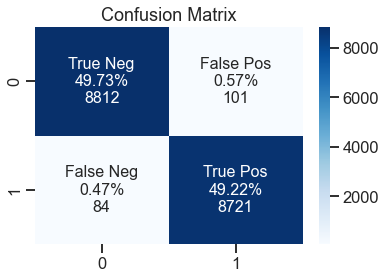

In [346]:
plt.rcParams.update({'font.size': 16})
# Get the confusion matrix
rf_clf_matrix = confusion_matrix(y_test, y_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in rf_clf_matrix.flatten()/np.sum(rf_clf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in rf_clf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip (names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(mlp_clf_matrix, annot=labels,
            fmt='', cmap='Blues').set(title='Confusion Matrix')

#### ROC Curve

In [347]:
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

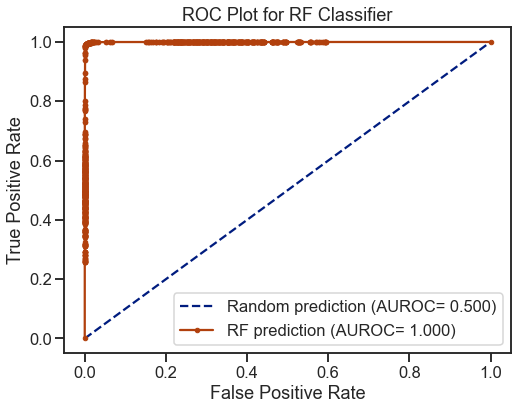

In [349]:
plt.rcParams.update({'font.size': 2})
plt.figure(figsize=(8, 6))
model = rf
#model = CalibratedClassifierCV(model)
#model.fit(X_train, y_train)

random_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test)
model_probs = model_probs[:,1]

# calculate area under roc curve
random_auc = roc_auc_score(y_test, random_probs)
model_auc = roc_auc_score(y_test, model_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='RF prediction (AUROC= %0.3f)' %model_auc)
plt.title('ROC Plot for RF Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [350]:
print("ROC Score:", roc_auc_score(y_test, y_pred_prob))

ROC Score: 0.9992185039647247


#### Precision-recall curve

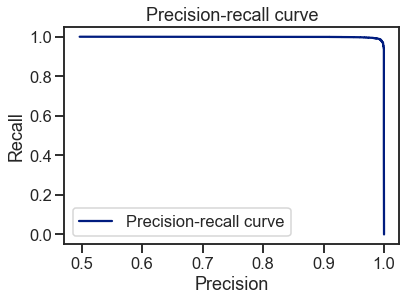

In [351]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

#### Average Precision Score

In [352]:
print("Average Precision Score: ", average_precision_score(y_test, y_pred_prob))

Average Precision Score:  0.9991877542571622


# (4) Logistic Regression

### Train-test split

After train test split is done, normalizer is applied as it gave the best accuracy for LR when compared to other scalers

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Apply normalizer
X_train = nsc.fit_transform(X_train)
X_test = nsc.fit_transform(X_test)

## (4.1) With Outliers

### Without Regularization

In [354]:
lr = LogisticRegression().fit(X_train, y_train) 
y_pred=lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8900553109831809


### With Regularization + Hyperparamater Tuning

In [445]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


LogisticRegression(C=0.0018329807108324356, max_iter=5000, penalty='l1',
                   solver='saga')

In [355]:
lr = LogisticRegression(C=0.004832930238571752, penalty='l1', solver='liblinear').fit(X_train, y_train) 
y_pred=lr.predict(X_test)
print("Accuracy Score for Logistic Regression with Outliers: ",accuracy_score(y_test, y_pred))
lr_with_outliers_accuracy = accuracy_score(y_test, y_pred)

Accuracy Score for Logistic Regression with Outliers:  0.8932159385935207


## (4.2) Without Outliers

In [356]:
X_train_noO, X_test_noO, y_train_noO, y_test_noO = train_test_split(X_noO, y_noO, test_size=0.20, random_state=42)

#Apply Normalizer
X_train_noO = rsc.fit_transform(X_train_noO)
X_test_noO = rsc.fit_transform(X_test_noO)

In [357]:
lr = LogisticRegression().fit(X_train_noO, y_train_noO) 
y_pred = lr.predict(X_test_noO)
y_pred_noO = lr.predict_proba(X_test_noO)[::,1]
print("Accuracy Score for Logistic Regression without Outliers: ",accuracy_score(y_test_noO, y_pred))
#C=0.03359818286283781, solver='liblinear'
y_pred_noO

Accuracy Score for Logistic Regression without Outliers:  0.9215845382118619


array([3.63939632e-05, 4.13717344e-01, 9.97598304e-01, ...,
       1.28460510e-01, 9.96244616e-01, 9.99655201e-01])

In [446]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_noO, y_train_noO)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


LogisticRegression(C=0.03359818286283781, solver='liblinear')

In [358]:
lr = LogisticRegression(C=0.0018329807108324356, solver='liblinear').fit(X_train_noO, y_train_noO) 
y_pred=lr.predict(X_test_noO)
print("Accuracy Score for Logistic Regression without Outliers: ",accuracy_score(y_test_noO, y_pred))
lr_without_outliers_accuracy = accuracy_score(y_test_noO, y_pred)

Accuracy Score for Logistic Regression without Outliers:  0.9258630864561818


### Evaluation

In [359]:
metrics = pd.DataFrame(index=['accuracy'],
                       columns=['Outliers','Without Outliers'])
metrics.loc['accuracy', 'Outliers'] = lr_with_outliers_accuracy
metrics.loc['accuracy', 'Without Outliers'] = lr_without_outliers_accuracy

In [360]:
#Set DataFrame title
100*metrics
metrics.style.set_table_attributes("style='display:inline'").set_caption('Logistic Regression Accuracy With and Without Outliers')

Result: Logistic Regression without Outliers gives better accuracy compared to with outliers so the following model evaluation will be based on the Logistic Regression model without outliers

#### Store best LR model

In [361]:
#fine tuned LR model without outliers
best_lr = lr

#### Cross Validation

In [363]:
cv_N = 4
scores = cross_val_score(lr, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.85871676 0.81559579 0.84620942 0.80168872]


0.8305526707906263

In [364]:
print(classification_report(y_test_noO, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8656
           1       0.97      0.82      0.89      4900

    accuracy                           0.93     13556
   macro avg       0.94      0.90      0.92     13556
weighted avg       0.93      0.93      0.92     13556



#### Confusion Matrix

Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix')]

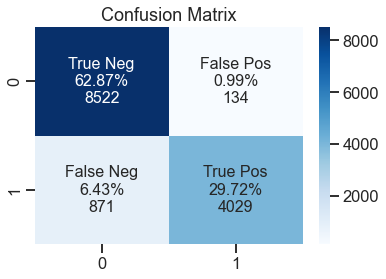

In [365]:
plt.rcParams.update({'font.size': 16})

#confusion matrix
# Get the confusion matrix
lr_matrix = confusion_matrix(y_test_noO, y_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in lr_matrix.flatten()/np.sum(lr_matrix)]
counts = ['{0:0.0f}'.format(value) for value in lr_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip (names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(lr_matrix, annot=labels,
            fmt='', cmap='Blues').set(title='Confusion Matrix')

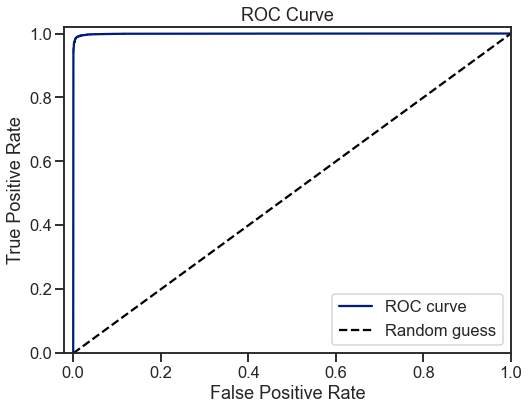

In [366]:
plt.rcParams.update({'font.size': 2})
plt.figure(figsize=(8, 6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [367]:
print("ROC Score: ",roc_auc_score(y_test_noO, y_pred_noO))

ROC Score:  0.9553538185144668


#### Precision_recall_curve

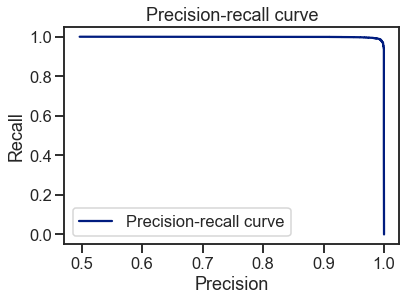

In [368]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

#### Average Precision Score

In [369]:
print("Average Precision Score: ", average_precision_score(y_test, y_pred_prob))

Average Precision Score:  0.9991877542571622


# (5) Decision Tree Classifier

Decision Trees are not sensitive to noisy data or outliers.
Therefore, we use the data with outliers to train the Decision Tree.
### Train-test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Without Hyperparameter Tuning

In [16]:
decision_tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Accuracy for Desicion Tree with standard parameter: ", accuracy_score(y_test, y_pred))

Accuracy for Desicion Tree with standard parameter:  0.9822214696918388


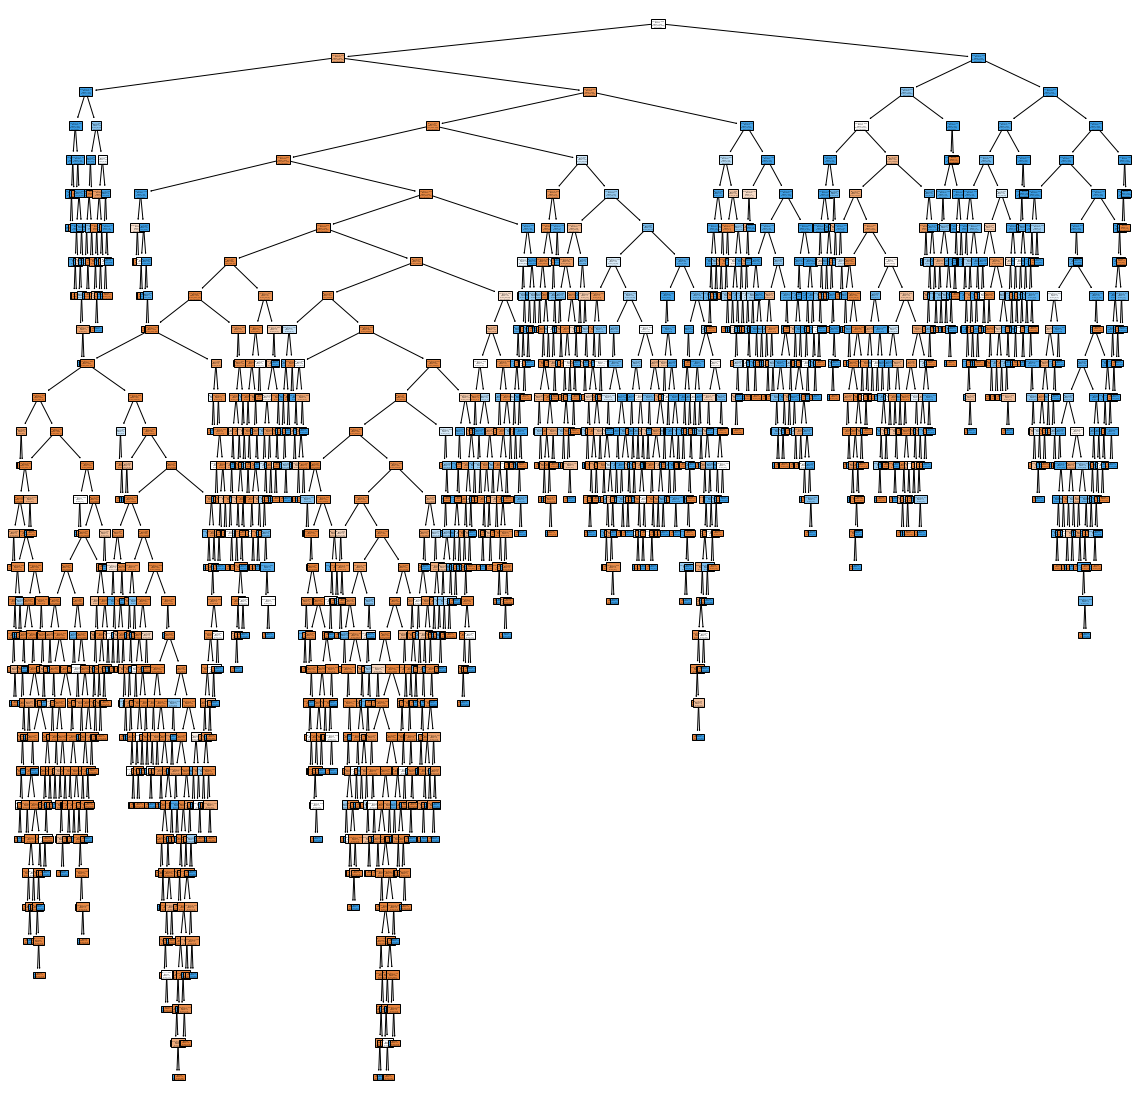

In [17]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['No activity','Activity']
tree.plot_tree(decision_tree, feature_names=features, class_names=classes, filled=True)
plt.show()

#### Post pruning Decision Tree with cost complexity pruning

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

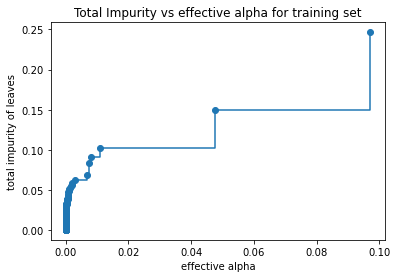

In [18]:
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [20]:
dc_clfs = []
for ccp_alpha in ccp_alphas:
    dc_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dc_clf.fit(X_train, y_train)
    dc_clfs.append(dc_clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dc_clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2534225336601008


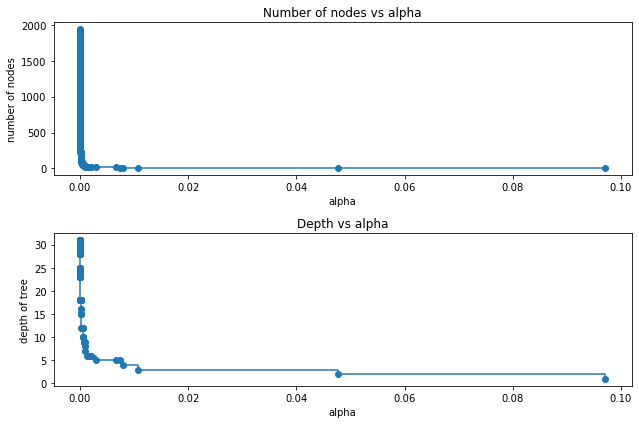

In [21]:
dc_clfs = dc_clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dc_clf.tree_.node_count for dc_clf in dc_clfs]
depth = [dc_clf.tree_.max_depth for dc_clf in dc_clfs]
fig, ax = plt.subplots(2, 1, figsize=(9,6))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

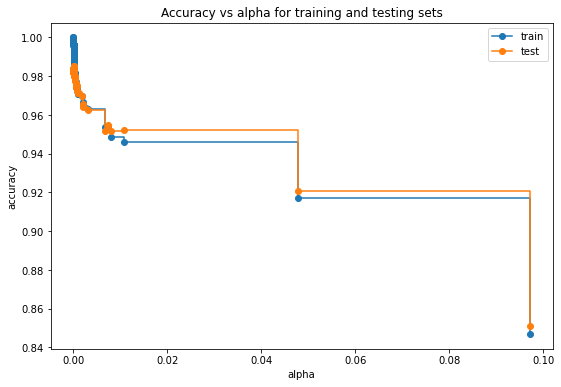

In [22]:
train_scores = [dc_clf.score(X_train, y_train) for dc_clf in dc_clfs]
test_scores = [dc_clf.score(X_test, y_test) for dc_clf in dc_clfs]

fig, ax = plt.subplots(figsize=(9,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [23]:
y_predicts = dc_clf.predict(X_test)

print("Accuracy for Desicion Tree after post pruning with ccp_alpha= 0.2534225336601008: ", accuracy_score(y_test, y_predicts))

Accuracy for Desicion Tree after post pruning with ccp_alpha= 0.2534225336601008:  0.49695225194717235


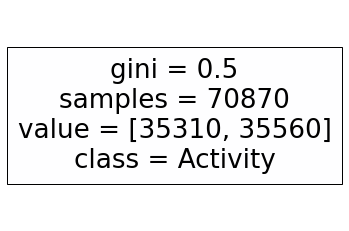

In [24]:
plt.figure()
features = data.columns
classes = ['No activity','Activity']
tree.plot_tree(dc_clf, feature_names=features, class_names=classes, filled=True)
plt.show()

#### With Hyperparameter Tuning

In [447]:
parameters={'criterion': ['gini', 'entropy'],
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100] }

from sklearn.model_selection import GridSearchCV
tuning_dtc=GridSearchCV(decision_tree, param_grid=parameters, cv=3, verbose=True, n_jobs=-1)
tuning_dtc.fit(X_train, y_train)
tuning_dtc.best_params_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [25]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42).fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Accuracy for Desicion Tree with hypeparameter: ", accuracy_score(y_test, y_pred))

Accuracy for Desicion Tree with hypeparameter:  0.98493057907213


#### Store Best Model

In [26]:
best_decision_tree = decision_tree

#### Classification Report

In [27]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

0            1  accuracy    macro avg  weighted avg
precision     0.984967     0.984893  0.984931      0.98493      0.984931
recall        0.985078     0.984781  0.984931      0.98493      0.984931
f1-score      0.985023     0.984837  0.984931      0.98493      0.984931
support    8913.000000  8805.000000  0.984931  17718.00000  17718.000000

#### Cross Validation Score

In [28]:
scores = cross_val_score(best_decision_tree, X, y, cv=5)
print('Cross validation scores of Decision Tree:')
print(scores)

Cross validation scores of Decision Tree:
[0.98007676 0.98526922 0.98673665 0.94829824 0.97081899]


#### Confusion Matrix

Confusion Matrix:


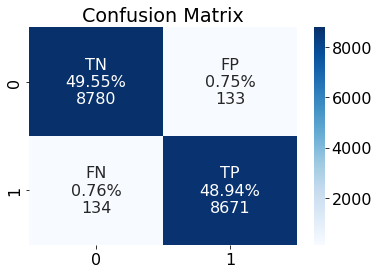

In [29]:
plt.rcParams.update({'font.size': 16})


decision_tree_matrix = confusion_matrix(y_test, y_pred)
names = ['TN', 'FP','FN','TP']
percentages = ['{0:.2%}'.format(value) for value in decision_tree_matrix.flatten()/np.sum(decision_tree_matrix)]
counts = ['{0:0.0f}'.format(value) for value in decision_tree_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(decision_tree_matrix, annot=labels, fmt='', cmap='Blues').set(title='Confusion Matrix');

#### ROC Curve

In [30]:
y_pred_prob = best_decision_tree.predict_proba(X_test)[:, 1]

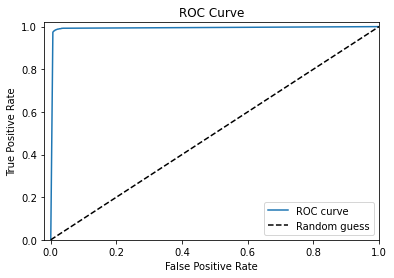

In [38]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [39]:
print("ROC Score: ", roc_auc_score(y_test, y_pred_prob))

ROC Score:  0.9926654613755417


#### Precision Recall Curve

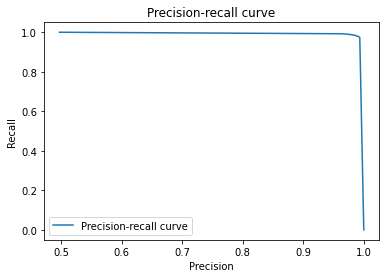

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

#### Average Precision Score

In [41]:
print("Average Precision Score: ", average_precision_score(y_test, y_pred_prob))

Average Precision Score:  0.9894797431295088


# (6) Extra Tree Classifier

Decision Trees are not sensitive to noisy data or outliers. Therefore, we use the data with outliers to train the Decision Tree.
### Train-test Split

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Wihout Hyperparameter Tuning

In [388]:
extra_tree = ExtraTreesClassifier(random_state=42)
extra_tree.fit(X_train, y_train)

y_pred = extra_tree.predict(X_test)

acc_extra_tree = accuracy_score(y_test, y_pred)
print("Accuracy Score for Extra Tree with default parameters: ", acc_extra_tree)

Accuracy Score for Extra Tree with default parameters:  0.9913647138503217


#### With Hyperparameter Tuning

In [448]:
parameters={'n_estimators': [10,50,100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [2,8,16,32,50],
            'min_samples_split': [2,4,6],
            'min_samples_leaf': [1,2]}

from sklearn.model_selection import GridSearchCV
tuning_etc=GridSearchCV(extra_tree, param_grid=parameters, cv=3, verbose=True, n_jobs=-1)
tuning_etc.fit(X_train, y_train)
tuning_etc.best_params_


Fitting 3 folds for each of 180 candidates, totalling 540 fits


{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [389]:
extra_tree = ExtraTreesClassifier(criterion='entropy', max_depth=50, random_state=42).fit(X_train, y_train)
y_pred = extra_tree.predict(X_test)

print("Accuracy for Extra Tree with hypeparameter: ", accuracy_score(y_test, y_pred))

Accuracy for Extra Tree with hypeparameter:  0.9918726718591263


#### Store Best Model

In [390]:
best_extra_tree = extra_tree

In [391]:
best_extra_tree_score = accuracy_score(y_test, y_pred)

#### Classification Report

In [392]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

0            1  accuracy     macro avg  weighted avg
precision     0.990053     0.993729  0.991873      0.991891      0.991880
recall        0.993829     0.989892  0.991873      0.991861      0.991873
f1-score      0.991937     0.991807  0.991873      0.991872      0.991873
support    8913.000000  8805.000000  0.991873  17718.000000  17718.000000

#### Cross Validation Score

In [393]:
scores = cross_val_score(best_extra_tree, X, y, cv=5)
print('Cross validation scores of knn:')
print(scores)

Cross validation scores of knn:
[0.99322723 0.99407382 0.99164691 0.96974657 0.98261557]


#### Confusion Matrix

Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix')]

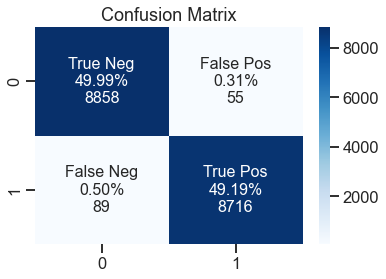

In [394]:
plt.rcParams.update({'font.size': 16})

# Get the confusion matrix
extra_tree_matrix = confusion_matrix(y_test, y_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in extra_tree_matrix.flatten()/np.sum(extra_tree_matrix)]
counts = ['{0:0.0f}'.format(value) for value in extra_tree_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip (names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(extra_tree_matrix, annot=labels,
            fmt='', cmap='Blues').set(title='Confusion Matrix')


#### ROC Curve

In [395]:
y_pred_prob = best_extra_tree.predict_proba(X_test)[:, 1]

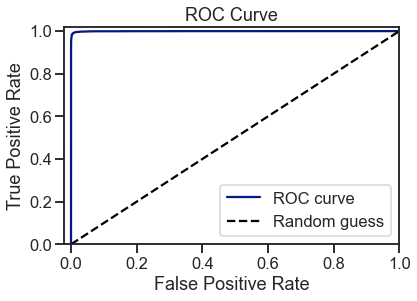

In [396]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [397]:
print("ROC Score: ",roc_auc_score(y_test, y_pred_prob))

ROC Score:  0.999467965715399


#### Precision Recall Curve

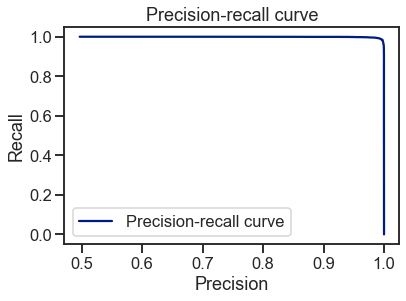

In [398]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

#### Average Precision Score

In [399]:
print("Average Precision Score: ", average_precision_score(y_test, y_pred_prob))

Average Precision Score:  0.999409227054606


# (7) Support Vector Machine

## (7.1) Data with Outliers

### Train-test Split
After train test split is done, standard scaler is applied as it gave the best accuracy for SVM when compared to other scalers

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Apply Standard Scaler
X_train_ss = ssc.fit_transform(X_train)
X_test_ss = ssc.fit_transform(X_test)

### Determine the best kernel
We compare the accuracy of the kernel 'linear', 'rbf', 'sigmoid', and 'polynomial' in SVM.

In [449]:
svm_df = pd.DataFrame()

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_ss, y_train)
y_pred = svm_linear.predict(X_test_ss)
linear_acc = accuracy_score(y_test, y_pred)
svm_df.loc['linear', 'Accuracy score'] = linear_acc

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_ss, y_train)
y_pred = svm_rbf.predict(X_test_ss)
rbf_acc = accuracy_score(y_test, y_pred)
svm_df.loc['rbf', 'Accuracy score'] = rbf_acc

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train_ss, y_train)
y_pred = svm_sigmoid.predict(X_test_ss)
sigmoid_acc = accuracy_score(y_test, y_pred)
svm_df.loc['sigmoid', 'Accuracy score'] = sigmoid_acc

svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_ss, y_train)
y_pred = svm_poly.predict(X_test_ss)
poly_acc = accuracy_score(y_test, y_pred)
svm_df.loc['polynomial', 'Accuracy score'] = poly_acc

In [457]:
svm_df

Accuracy score
linear            0.858675
rbf               0.989446
sigmoid           0.646913
polynomial        0.947172

From the above table, we can see that the best kernel is 'rbf' which gave the highest accuracy. Therefore, we use this kernel to do further evaluation.

#### Without Hyperparameter Tuning

In [401]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_ss, y_train)
y_pred = svm_clf.predict(X_test_ss)

print("Accuracy Score for SVM with default parameters: ", accuracy_score(y_test, y_pred))

Accuracy Score for SVM with default parameters:  0.9894457613726154


#### With Hyperparameter Tuning

In [450]:
# defining parameter range
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV
tuning_svm=GridSearchCV(svm_clf, param_grid=parameters, cv=3, verbose=True, n_jobs=-1)


In [451]:
tuning_svm.fit(X_train_ss, y_train)
tuning_svm.best_params_
#tuning_svm.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [402]:
tuning_svm = SVC(kernel='rbf',C=10, gamma=1).fit(X_train_ss, y_train)
y_pred = tuning_svm.predict(X_test_ss)
svm_with_outliers_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for SVM with hypeparameter: ", svm_with_outliers_accuracy)

Accuracy for SVM with hypeparameter:  0.991590472965346


## (7.2) Data without Outliers

### Train-test Split

In [403]:
X_train_noO, X_test_noO, y_train_noO, y_test_noO = train_test_split(X_noO, y_noO, test_size=0.20, random_state=42)

#Apply Standard Scaler
X_train_noO_ss = ssc.fit_transform(X_train_noO)
X_test_noO_ss = ssc.fit_transform(X_test_noO)

In [452]:
svm_df_noO = pd.DataFrame()

svm_linear_noO = SVC(kernel='linear')
svm_linear_noO.fit(X_train_noO_ss, y_train_noO)
y_pred_noO = svm_linear_noO.predict(X_test_noO_ss)
linear_acc = accuracy_score(y_test_noO, y_pred_noO)
svm_df_noO.loc['linear', 'Accuracy score'] = linear_acc

svm_rbf_noO = SVC(kernel='rbf')
svm_rbf_noO.fit(X_train_noO_ss, y_train_noO)
y_pred_noO = svm_rbf_noO.predict(X_test_noO_ss)
rbf_acc = accuracy_score(y_test_noO, y_pred_noO)
svm_df_noO.loc['rbf', 'Accuracy score'] = rbf_acc

svm_sigmoid_noO = SVC(kernel='sigmoid')
svm_sigmoid_noO.fit(X_train_noO_ss, y_train_noO)
y_pred_noO = svm_sigmoid_noO.predict(X_test_noO_ss)
sigmoid_acc = accuracy_score(y_test_noO, y_pred_noO)
svm_df_noO.loc['sigmoid', 'Accuracy score'] = sigmoid_acc

svm_poly_noO = SVC(kernel='poly')
svm_poly_noO.fit(X_train_noO_ss, y_train_noO)
y_pred_noO = svm_poly_noO.predict(X_test_noO_ss)
poly_acc = accuracy_score(y_test_noO, y_pred_noO)
svm_df_noO.loc['polynomial', 'Accuracy score'] = poly_acc

In [453]:
svm_df_noO

Accuracy score
linear            0.926232
rbf               0.988123
sigmoid           0.798466
polynomial        0.971894

From the above table, we can see that the best kernel is 'rbf' which gave the highest accuracy. Therefore, we use this kernel to do further evaluation.

#### Without Hyperparameter

In [404]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_noO_ss, y_train_noO)
y_pred_noO = svm_clf.predict(X_test_noO_ss)

print("Accuracy Score for SVM without Outliers in default parameters: ", accuracy_score(y_test_noO, y_pred_noO))

Accuracy Score for SVM without Outliers in default parameters:  0.9881233402183535


#### With Hyperparameter

In [454]:
# defining parameter range
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
tuning_svm=GridSearchCV(svm_clf, param_grid=parameters, cv=3, verbose=True, n_jobs=-1)
tuning_svm.fit(X_train_noO_ss, y_train_noO)
tuning_svm.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


SVC(C=1, gamma=1)

In [405]:
tuning_svm = SVC(kernel='rbf', C=1, gamma=1).fit(X_train, y_train)
y_pred = tuning_svm.predict(X_test)
svm_without_outliers_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy for SVM with hypeparameter: ", svm_without_outliers_accuracy)

Accuracy for SVM with hypeparameter:  0.9895022011513714


## Evaluation

In [406]:
metrics = pd.DataFrame(index=['accuracy'],
                       columns=['Outliers','Without Outliers'])
metrics.loc['accuracy', 'Outliers'] = svm_with_outliers_accuracy
metrics.loc['accuracy', 'Without Outliers'] = svm_without_outliers_accuracy

In [407]:
#Set DataFrame title
100*metrics
metrics.style.set_table_attributes("style='display:inline'").set_caption('SVM Accuracy With and Without Outliers')

#### Store best SVM model
Result: Since SVM with outliers has higher accuracy, so the following model evaluation will be based on the SVM model with outliers

In [408]:
#fine tuned SVM with outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_ss = ssc.fit_transform(X_train)
X_test_ss = ssc.fit_transform(X_test)

best_svm_clf = SVC(kernel='rbf',C=10, gamma=1, probability = True).fit(X_train_ss, y_train)
y_pred = best_svm_clf.predict(X_test_ss)

#### Classification Report

In [409]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

0            1  accuracy     macro avg  weighted avg
precision     0.990157     0.993051   0.99159      0.991604      0.991595
recall        0.993156     0.990006   0.99159      0.991581      0.991590
f1-score      0.991654     0.991526   0.99159      0.991590      0.991590
support    8913.000000  8805.000000   0.99159  17718.000000  17718.000000

#### Cross Validation Score

In [410]:
scores = cross_val_score(best_svm_clf, X, y, cv=5)
print('Cross validation scores of SVM:')
print(scores)

Cross validation scores of SVM:
[0.98910712 0.99181623 0.98882492 0.96731952 0.97843879]


#### Confusion Matrix

Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix')]

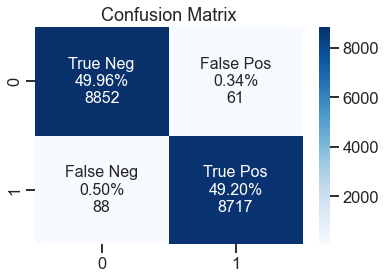

In [411]:
plt.rcParams.update({'font.size': 16})
# Get the confusion matrix
svm_clf_matrix = confusion_matrix(y_test, y_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in svm_clf_matrix.flatten()/np.sum(svm_clf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in svm_clf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip (names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(svm_clf_matrix, annot=labels,
            fmt='', cmap='Blues').set(title='Confusion Matrix')

#### ROC Curve

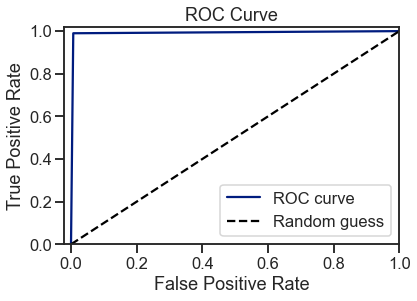

In [412]:
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [413]:
print("ROC Score: ",roc_auc_score(y_test, y_pred))

ROC Score:  0.991580871383816


#### Precision_recall_curve

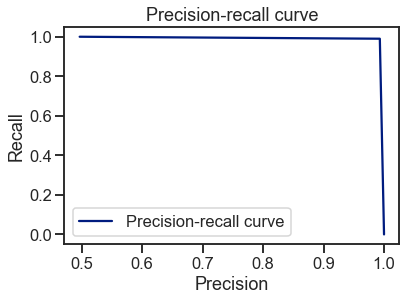

In [414]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [415]:
average_precision_score(y_test, y_pred)

0.9880926404125037

## (8) Neural Network

### Data with Outliers

#### Without Tuning

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#apply robust scaler as it gives the best accuracy compared to other scalers
X_train = rsc.fit_transform(X_train)
X_test = rsc.fit_transform(X_test)

In [417]:
# multi layer perceptron
mlp = MLPClassifier(max_iter=1000, random_state=42)

In [418]:
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print(classification_report(y_test, mlp_pred))
print(confusion_matrix(y_test, mlp_pred))
print("Accuracy for training: {}".format(mlp.score(X_train, y_train)))
print("Accuracy for testing : {}".format(mlp.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

[[8853   60]
 [  83 8722]]
Accuracy for training: 0.9922957527867927
Accuracy for testing : 0.9919291116378823


#### Hyperparameter Tuning

In [455]:
mlp_params = {
    'activation' : ['tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

clf = GridSearchCV(mlp, param_grid = mlp_params, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


MLPClassifier(activation='tanh', max_iter=1000, random_state=42)

In [419]:
mlp = MLPClassifier(activation='tanh', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print(classification_report(y_test, mlp_pred))
print(confusion_matrix(y_test, mlp_pred))
print("Accuracy for training: {}".format(mlp.score(X_train, y_train)))
print("Accuracy for testing : {}".format(mlp.score(X_test, y_test)))
mlp_with_outliers_accuracy = mlp.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

[[8841   72]
 [  75 8730]]
Accuracy for training: 0.9922957527867927
Accuracy for testing : 0.9917033525228581


### Data without Outliers

#### Without Tuning

In [420]:
X_noO = data_noOutlier.drop(['activity'], axis=1)
y_noO = data_noOutlier['activity']

In [421]:

X_train, X_test, y_train, y_test = train_test_split(X_noO, y_noO, test_size=0.20, random_state=42)
#apply robust scaler as it gives the best accuracy compared to other scalers
X_train = rsc.fit_transform(X_train)
X_test = rsc.fit_transform(X_test)

In [422]:
# multi layer perceptron
mlp = MLPClassifier(max_iter=1000, random_state=42)

In [423]:
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print(classification_report(y_test, mlp_pred))
print(confusion_matrix(y_test, mlp_pred))
print("Accuracy for training: {}".format(mlp.score(X_train, y_train)))
print("Accuracy for testing : {}".format(mlp.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8656
           1       0.99      0.98      0.98      4900

    accuracy                           0.99     13556
   macro avg       0.99      0.99      0.99     13556
weighted avg       0.99      0.99      0.99     13556

[[8609   47]
 [ 101 4799]]
Accuracy for training: 0.9909074142382884
Accuracy for testing : 0.9890823251696665


#### Hyperparameter Tuning

In [456]:
mlp_params = {
    'activation' : ['tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, param_grid = mlp_params, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
best_clf.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'activation': 'tanh', 'learning_rate': 'constant', 'solver': 'adam'}

In [424]:
mlp = MLPClassifier(activation='tanh', learning_rate='constant', solver='adam' ,max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print(classification_report(y_test, mlp_pred))
print(confusion_matrix(y_test, mlp_pred))
print("Accuracy for training: {}".format(mlp.score(X_train, y_train)))
print("Accuracy for testing : {}".format(mlp.score(X_test, y_test)))
mlp_without_outliers_accuracy = mlp.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8656
           1       0.99      0.98      0.99      4900

    accuracy                           0.99     13556
   macro avg       0.99      0.99      0.99     13556
weighted avg       0.99      0.99      0.99     13556

[[8603   53]
 [  90 4810]]
Accuracy for training: 0.9907598672076724
Accuracy for testing : 0.9894511655355562


### Evaluation

In [425]:
metrics = pd.DataFrame(index=['accuracy'],
                       columns=['Outliers','Without Outliers'])
metrics.loc['accuracy', 'Outliers'] = mlp_with_outliers_accuracy
metrics.loc['accuracy', 'Without Outliers'] = mlp_without_outliers_accuracy

In [426]:
#Set DataFrame title
100*metrics
metrics.style.set_table_attributes("style='display:inline'").set_caption('MLP Accuracy With and Without Outliers')

Result: MLP model with outliers gives better accuracy compared to without outliers.

#### Store Best Model

In [427]:
#mlp with outliers 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = rsc.fit_transform(X_train)
X_test = rsc.fit_transform(X_test)

best_mlp = MLPClassifier(max_iter=1000, random_state=42)
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)

#### Classification Report

In [428]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

0            1  accuracy     macro avg  weighted avg
precision     0.990712     0.993168  0.991929      0.991940      0.991932
recall        0.993268     0.990574  0.991929      0.991921      0.991929
f1-score      0.991988     0.991869  0.991929      0.991929      0.991929
support    8913.000000  8805.000000  0.991929  17718.000000  17718.000000

#### Cross Validation Score

In [429]:
scores = cross_val_score(best_mlp, X, y, cv=5)
print('Cross validation scores of knn:')
print(scores)

Cross validation scores of knn:
[0.98989728 0.99345299 0.990631   0.96844838 0.98402664]


#### Confusion Matrix

Confusion Matrix:


[Text(0.5, 1.0, 'Confusion Matrix')]

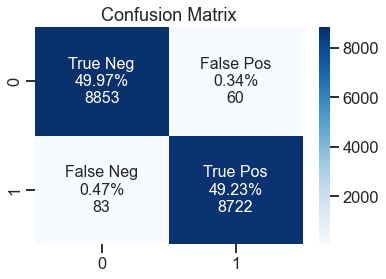

In [430]:
plt.rcParams.update({'font.size': 16})
# Get the confusion matrix
mlp_clf_matrix = confusion_matrix(y_test, y_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
percentages = ['{0:.2%}'.format(value) for value in mlp_clf_matrix.flatten()/np.sum(mlp_clf_matrix)]
counts = ['{0:0.0f}'.format(value) for value in mlp_clf_matrix.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip (names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)

print("Confusion Matrix:")
sns.heatmap(mlp_clf_matrix, annot=labels,
            fmt='', cmap='Blues').set(title='Confusion Matrix')

#### ROC Curve

In [431]:
y_pred_prob = best_mlp.predict_proba(X_test)[:, 1]

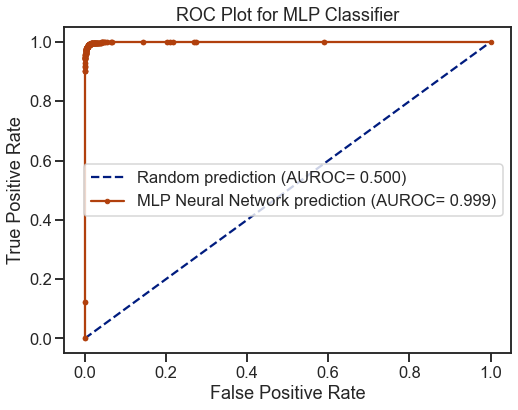

In [433]:
plt.rcParams.update({'font.size': 2})
plt.figure(figsize=(8, 6))
model = mlp
#model = CalibratedClassifierCV(model)
#model.fit(X_train, y_train)

random_probs = [0 for _ in range(len(y_test))]
model_probs = model.predict_proba(X_test)
model_probs = model_probs[:,1]

# calculate area under roc curve
random_auc = roc_auc_score(y_test, random_probs)
model_auc = roc_auc_score(y_test, model_probs)

random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(random_fpr, random_tpr,linestyle='--', label='Random prediction (AUROC= %0.3f)' %random_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='MLP Neural Network prediction (AUROC= %0.3f)' %model_auc)
plt.title('ROC Plot for MLP Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [434]:
print("ROC Score:", roc_auc_score(y_test, y_pred_prob))

ROC Score: 0.999536716622091


#### Precision-recall curve

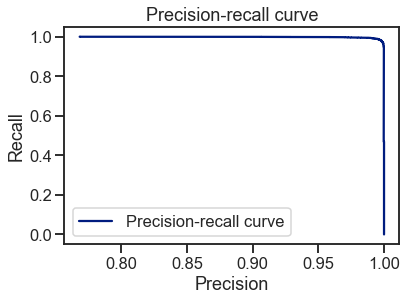

In [435]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

#### Average Precision Score

In [436]:
print("Average Precision Score: ", average_precision_score(y_test, y_pred_prob))

Average Precision Score:  0.9995400929545046


## Evaluation of Models

In [161]:
import plotly.figure_factory as ff
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn import metrics
from itertools import zip_longest

# init_notebook_mode(connected=True)
pyo.init_notebook_mode()

In [162]:
#confusion matrix 
lst =[best_knn, best_nb, best_rf, best_lr, best_decision_tree, best_extra_tree, best_svm_clf, best_mlp]

false_positive = list()
false_negative = list()

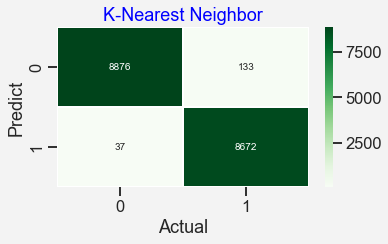

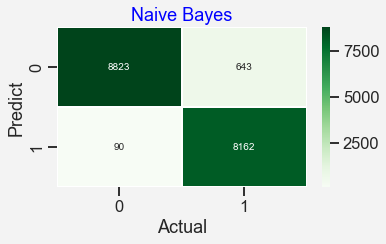

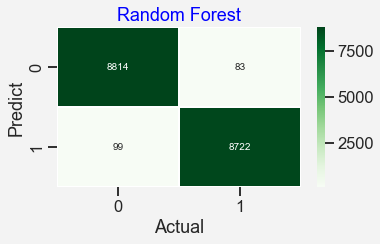

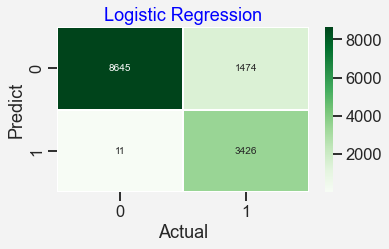

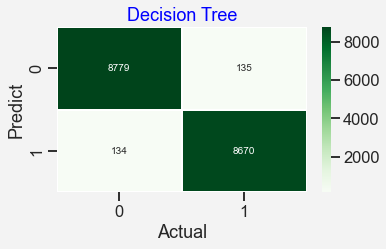

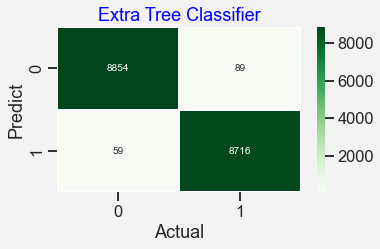

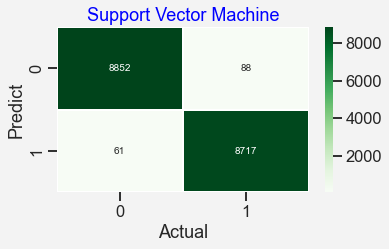

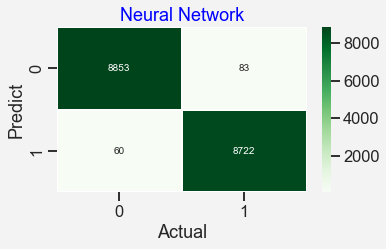

In [163]:
def model_report(model,X_train,X_test,y_train,y_test,name, j):
   
    model.fit(X_train,y_train) 
    predictions =model.predict(X_test) 
    probability =model.predict_proba(X_test)
    
    accuracy =accuracy_score(y_test, predictions)
    recallscore = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1score = metrics.f1_score(y_test, predictions)
    logloss = metrics.log_loss(y_test, probability)
    df = pd.DataFrame({"Model" : [name],
                        "Accuracy score" : [accuracy],
                        "Recall score" : [recallscore],
                        "Precision" : [precision],
                        "F1 score" : [f1score],
                        "Log loss" : [logloss]})
    
        
    cm = confusion_matrix(predictions,y_test)
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    
    fig = plt.figure(figsize=(15,12))
    fig.set_facecolor("#F3F3F3")
    plt.subplot(4,3,j)

    sns.heatmap(cm,annot=True,fmt = "d",
                xticklabels = (['0', '1']), 
                yticklabels =(['0','1']), linewidths = 2,cmap = "Greens") 
    plt.title(name,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

    plt.xlabel('Actual')
    plt.ylabel('Predict')
    plt.tight_layout()
    
    
    return df, FP, FN
knn_model, FP_knn, FN_knn = model_report(best_knn,X_train_rs, X_test_rs,y_train,y_test,"K-Nearest Neighbor", 1)
nb_model, FP_nb, FN_nb = model_report(best_nb,X_train, X_test,y_train,y_test,"Naive Bayes", 2)
rf_model, FP_rf, FN_rf = model_report(best_rf,X_train,X_test,y_train,y_test,"Random Forest", 3)
lr_model, FP_lr, FN_lr = model_report(best_lr,X_train_noO, X_test_noO, y_train_noO, y_test_noO,"Logistic Regression", 4)
dt_model, FP_dt, FN_dt = model_report(best_decision_tree,X_train, X_test,y_train,y_test,"Decision Tree", 5)
et_model, FP_et, FN_et = model_report(best_extra_tree,X_train, X_test,y_train,y_test,"Extra Tree Classifier", 6)
svm_model, FP_svm, FN_svm = model_report(best_svm_clf,X_train_ss, X_test_ss,y_train,y_test,"Support Vector Machine", 7)
mlp_model, FP_mlp, FN_mlp = model_report(best_mlp,X_train_rs, X_test_rs,y_train,y_test,"Neural Network", 8)
# Concat all models
model_performances = pd.concat([knn_model, nb_model, rf_model, lr_model, dt_model, et_model, svm_model, mlp_model],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)
table = ff.create_table(np.round(model_performances,4))

In [164]:
pyo.plot(table)

'temp-plot.html'

In [165]:
false_positive.extend([FP_knn[1], FP_nb[1], FP_rf[1], FP_lr[1], FP_dt[1], FP_et[1], FP_svm[1], FP_mlp[1]])
false_negative.extend([FN_knn[1], FN_nb[1], FN_rf[1], FN_lr[1], FN_dt[1], FN_et[1], FN_svm[1], FN_mlp[1]])

In [166]:
mods = ['K-Nearest Neighbours', 'Gaussian Naive Bayes',
        'Random Forest','Logistic Regression', 'Decision Tree', 'Extra Tree Classifier',
        'Support Vector Machine', 'Neural Network']

df_fp_fn = pd.DataFrame()

for models in lst:
    df_fp_fn['Model'] = mods
    df_fp_fn['False Positive'] = false_positive
    df_fp_fn['False Negative'] = false_negative

display(df_fp_fn.style.set_caption("FN & FP for Each Algorithm").set_table_styles([{'selector': 'caption',
                                                                                  'props': [('color', 'black'),
                                                                                            ('font-size', '17px'),
                                                                                            ("text-align", "center")]}]))

## ROC Curve and AUC

In [167]:
from sklearn.metrics import roc_curve, roc_auc_score

In [168]:
# Train the models and record the results
def roc_auc (model, X_train, X_test, y_train, y_test, result_table, name, i):
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table
    return result(model, fpr, tpr, auc, result_table, name)

def result(model, fpr, tpr, auc, result_table, name):
    result_table = result_table.append({'classifiers': name,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
  
    return result_table

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table = roc_auc(best_knn,X_train_rs, X_test_rs,y_train,y_test, result_table, "K-Nearest Neighbor", 1)
result_table = roc_auc(best_nb,X_train, X_test,y_train,y_test, result_table, "Naive Bayes", 2)
result_table = roc_auc(best_rf,X_train,X_test,y_train,y_test, result_table,"Random Forest", 3)
result_table = roc_auc(best_lr,X_train_noO, X_test_noO, y_train_noO, y_test_noO, result_table, "Logistic Regression", 4)
result_table = roc_auc(best_decision_tree,X_train, X_test,y_train,y_test, result_table, "Decision Tree", 5)
result_table = roc_auc(best_extra_tree,X_train, X_test,y_train,y_test, result_table, "Extra Tree", 6)
result_table = roc_auc(best_svm_clf,X_train_ss, X_test_ss,y_train,y_test, result_table, "Support Vector Machine", 7)
result_table = roc_auc(best_mlp,X_train_rs, X_test_rs,y_train,y_test, result_table, "Neural Network", 8)



# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


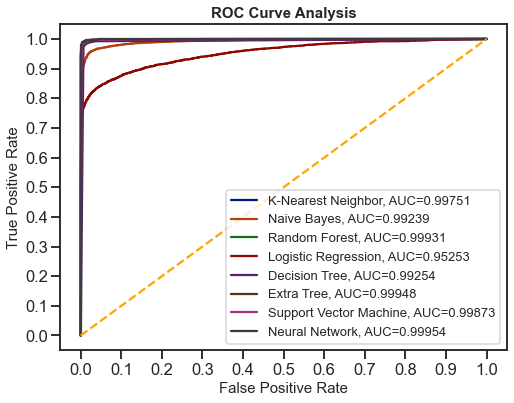

In [169]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.5f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Ensemble Method 1 - Boosting Extra Tree Classifier (Best Model)

We try to improve the accuracy of our best model, Extra Tree Classifier by applying AdaBoost.

## AdaBoost Classifier

In [179]:
#testing with extra_tree
#Accuracy for Extra Tree with hypeparameter:  0.9918726718591263
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

AdaBoost = AdaBoostClassifier(base_estimator=best_extra_tree)
#AdaBoost = AdaBoostClassifier(base_estimator=best_extra_tree,learning_rate= 0.1, n_estimators=500)

abc = AdaBoost.fit(X_train, y_train)
y_pred = abc.predict(X_test)

print("Accuracy for training: {}".format(abc.score(X_train, y_train)))
print("Accuracy for testing: {}\n\n".format(abc.score(X_test, y_test)))

Accuracy for training: 1.0
Accuracy for testing: 0.992380629867931




#### Evaluation

In [180]:
metrics = pd.DataFrame(index=['accuracy'],
                       columns=['Before Boosting','After Boosting'])
metrics.loc['accuracy', 'Before Boosting'] = best_extra_tree_score 
metrics.loc['accuracy', 'After Boosting'] = abc.score(X_test, y_test)

In [181]:
#Set DataFrame title
100*metrics
metrics.style.set_table_attributes("style='display:inline'").set_caption('AdaBoost + Extra Tree Classifiers')

#### Store Best Model

In [182]:
best_extra_tree = abc

# Ensemble Method 2 - Ensemble of 3 Best Models

In [437]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of models
estimators=[('mlp', best_mlp), ('etc', best_extra_tree), ('svm', best_svm_clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [438]:
ensemble.fit(X_train, y_train)
pred_ensemble = ensemble.predict(X_test)

In [439]:
pd.DataFrame(classification_report(y_test, pred_ensemble, output_dict=True))

0            1  accuracy     macro avg  weighted avg
precision     0.991383     0.993851  0.992606      0.992617      0.992610
recall        0.993941     0.991255  0.992606      0.992598      0.992606
f1-score      0.992661     0.992551  0.992606      0.992606      0.992606
support    8913.000000  8805.000000  0.992606  17718.000000  17718.000000

Accuracy for training: 0.995710455764075
Accuracy for testing: 0.9926063889829552




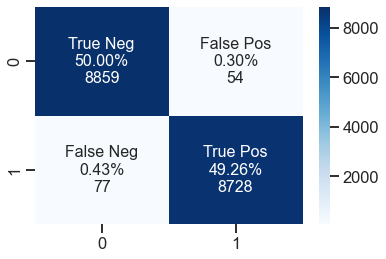

In [440]:
plt.rcParams.update({'font.size': 16})

ensemble_cf = confusion_matrix(y_test, pred_ensemble)
names = ['True Neg', 'False Pos','False Neg','True Pos']
percentages = ['{0:.2%}'.format(value) for value in ensemble_cf.flatten()/np.sum(ensemble_cf)]
counts = ['{0:0.0f}'.format(value) for value in ensemble_cf.flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, percentages, counts)]
labels = np.asarray(labels).reshape(2,2)
print("Accuracy for training: {}".format(ensemble.score(X_train, y_train)))
print("Accuracy for testing: {}\n\n".format(ensemble.score(X_test, y_test)))
sns.heatmap(ensemble_cf, annot=labels, fmt='', cmap='Blues');

## Save the Best Model (Extra Tree)

In [187]:
import pickle
#Save the best model, MLP into file
Pkl_Filename = "Pickle_ETC_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(best_extra_tree, file)

## Load the Best Model

In [188]:
#Load the best model from file
Pkl_Filename = "Pickle_ETC_Model.pkl"
with open ( Pkl_Filename , 'rb' ) as file:
    Pickled_ETC_Model = pickle.load(file)

Pickled_ETC_Model

AdaBoostClassifier(base_estimator=ExtraTreesClassifier(criterion='entropy',
                                                       max_depth=50,
                                                       random_state=42))

#### Calculate the accuracy score using the Reloaded Model

In [189]:
score = Pickled_ETC_Model.score(X_test, y_test)

print("Test score: {0:.2f} %" . format(100 * score))

Test score: 99.24 %


## Save the Ensemble Model

In [190]:
#Save the Ensemble Model (MLP, ET, RF) into file
Pkl_Filename = "Pickle_Ensemble_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(ensemble, file)

## Load the Ensemble Model

In [191]:
#Load the best model from file
Pkl_Filename = "Pickle_Ensemble_Model.pkl"
with open (Pkl_Filename , 'rb') as file:
    Pickled_Ensemble_Model = pickle.load(file)

Pickled_Ensemble_Model

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(max_iter=1000, random_state=42)),
                             ('etc',
                              AdaBoostClassifier(base_estimator=ExtraTreesClassifier(criterion='entropy',
                                                                                     max_depth=50,
                                                                                     random_state=42))),
                             ('svm', SVC(C=10, gamma=1, probability=True))])

#### Calculate the accuracy score using the Reloaded Model

In [192]:
score = Pickled_Ensemble_Model.score(X_test, y_test)

print("Test score: {0:.2f} %" . format(100 * score))

Test score: 99.22 %
